In [1]:
pwd

'/home/avani/src/dataset_div'

In [2]:
cd ..

/home/avani/src


In [3]:
from utils import calc_third_quartile, get_unique_act, get_compliant_cases, plot_case_occ 
import numpy as np
import os
import pickle
import pandas as pd
import random
from statistics import mean, median

In [4]:
path = "dataset/"
dataset = "bpi2019"
df = pd.read_csv(path+dataset+".csv")
# df["CompleteTimestamp"] = df.CompleteTimestamp.astype("<M8[ns]")

In [5]:
df

,CaseID,ActivityID,CompleteTimestamp
0,0,1,28.09.2018-10:36:00
1,0,3,31.10.2018-15:55:00
2,0,4,07.12.2018-09:08:00
3,1,1,30.07.2018-10:22:00
4,1,2,07.08.2018-14:29:00
...,...,...,...
101709,24898,2,22.08.2018-07:30:00
101710,24898,3,22.08.2018-12:54:00
101711,24898,4,13.09.2018-16:41:00
101712,24899,1,02.01.2018-15:42:00


In [6]:
df["CompleteTimestamp"]

0         28.09.2018-10:36:00
1         31.10.2018-15:55:00
2         07.12.2018-09:08:00
3         30.07.2018-10:22:00
4         07.08.2018-14:29:00
                 ...         
101709    22.08.2018-07:30:00
101710    22.08.2018-12:54:00
101711    13.09.2018-16:41:00
101712    02.01.2018-15:42:00
101713    11.01.2018-17:10:00
Name: CompleteTimestamp, Length: 101714, dtype: object

In [7]:
dff = pd.read_csv(path+dataset+".csv")
dff

,CaseID,ActivityID,CompleteTimestamp
0,0,1,28.09.2018-10:36:00
1,0,3,31.10.2018-15:55:00
2,0,4,07.12.2018-09:08:00
3,1,1,30.07.2018-10:22:00
4,1,2,07.08.2018-14:29:00
...,...,...,...
101709,24898,2,22.08.2018-07:30:00
101710,24898,3,22.08.2018-12:54:00
101711,24898,4,13.09.2018-16:41:00
101712,24899,1,02.01.2018-15:42:00


In [8]:
env_name = "bpi2019"
df2 = pd.read_pickle('dataset/preprocessed/'+env_name+'_design_mat.pkl')

In [9]:
df2

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,duration_time,remaining_time,class,CaseID
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,69.938889,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,33.221528,36.717361,3,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,36.717361,0.000000,4,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,88.027778,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.171528,79.856250,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101709,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.961111,22.382639,2,24898
101710,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.225000,22.157639,3,24898
101711,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,22.157639,0.000000,4,24898
101712,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,9.061111,1,24899


In [10]:
df2[df2["duration_time"]<0]

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,duration_time,remaining_time,class,CaseID


In [11]:
df2[df2['CaseID']==1]

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,duration_time,remaining_time,class,CaseID
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,88.027778,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.171528,79.856250,2,1
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,56.850000,23.006250,3,1
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,23.006250,0.000000,4,1


In [12]:
len(df2["CaseID"].unique())

24900

In [13]:
# get process flow compliance cases only
df = get_compliant_cases(df2,dset="bpi2019") 
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,duration_time,remaining_time,class,CaseID
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,88.027778,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.171528,79.856250,2,1
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,56.850000,23.006250,3,1
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,23.006250,0.000000,4,1
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,77.247917,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101709,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.961111,22.382639,2,24898
101710,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.225000,22.157639,3,24898
101711,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,22.157639,0.000000,4,24898
101712,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,9.061111,1,24899


In [14]:
caseId_lis = df["CaseID"].unique()
num_cases = len(caseId_lis)
num_cases

16724

In [15]:
16724/24900

0.6716465863453815

In [16]:
import random
random.shuffle(caseId_lis)

In [17]:
train_cases_start = 0
train_cases_end = int(.65*num_cases)
val_cases_start = train_cases_end
val_cases_end = int(val_cases_start + .1*num_cases)
test_cases_start = val_cases_end 
test_cases_end = num_cases


In [18]:
cases_train = caseId_lis[train_cases_start:train_cases_end]
cases_val = caseId_lis[val_cases_start:val_cases_end]
cases_test = caseId_lis[test_cases_start:test_cases_end]

In [19]:
# df = pd.read_pickle('dataset/preprocessed/helpdesk.pkl')
dat_group = df2.groupby("CaseID")

total_iter = len(dat_group.ngroup())
case_duration_dic = {}
for name, gr in dat_group:
    case_duration_dic[name] = gr['duration_time'].sum()
    

In [20]:
max(df2['duration_time'])

325.06111111111113

In [21]:
case_duration_dic

{0: 69.9388888888889,
 1: 88.02777777777777,
 2: 77.24791666666667,
 3: 70.13333333333333,
 4: 11.04861111111111,
 5: 42.225,
 6: 13.635416666666666,
 7: 26.742361111111112,
 8: 66.37777777777778,
 9: 38.94583333333334,
 10: 66.58472222222223,
 11: 14.634027777777778,
 12: 87.28055555555555,
 13: 81.37708333333333,
 14: 65.13402777777777,
 15: 21.224305555555556,
 16: 66.52152777777778,
 17: 42.69791666666667,
 18: 0.8631944444444445,
 19: 119.22083333333333,
 20: 50.31458333333333,
 21: 66.11805555555556,
 22: 110.82916666666667,
 23: 0.0,
 24: 64.01944444444445,
 25: 54.950694444444444,
 26: 0.0,
 27: 18.992361111111112,
 28: 52.298611111111114,
 29: 55.22708333333334,
 30: 20.293055555555554,
 31: 139.06666666666666,
 32: 14.235416666666666,
 33: 98.9701388888889,
 34: 26.988194444444446,
 35: 55.993750000000006,
 36: 0.0,
 37: 107.97291666666666,
 38: 0.0,
 39: 24.836111111111112,
 40: 55.3625,
 41: 11.697916666666666,
 42: 127.25972222222222,
 43: 107.90069444444444,
 44: 99.96805

reference for calulating quartile [here](http://web.mnstate.edu/peil/MDEV102/U4/S36/S363.html#:~:text=The%20third%20quartile%2C%20denoted%20by,25%25%20lie%20above%20Q3%20)

In [22]:
mean(case_duration_dic.values())

65.99817715305667

In [23]:
# quartile calculation 
case_durations = list(case_duration_dic.values())
third_quartile  = calc_third_quartile(case_durations)

In [24]:
third_quartile

94.01527777777778

In [25]:
cases_gs = []
cases_gv = []
for k,v in case_duration_dic.items():
    if v <= third_quartile:
        cases_gs.append(k)
    else:
        cases_gv.append(k)

In [26]:
len(cases_gs), len(cases_gv)

(18675, 6225)

In [27]:
gs_data = df.loc[df['CaseID'].isin(cases_gs)]
gv_data = df.loc[df['CaseID'].isin(cases_gv)]

In [28]:
tot = len(cases_gs)+ len(cases_gv)
percent_gs_cases = len(cases_gs) / tot
print(percent_gs_cases)

0.75


In [29]:
df.shape, len(cases_train), len(cases_val), len(cases_test)

((65413, 37), 10870, 1672, 4182)

In [30]:
data_train = df.loc[df['CaseID'].isin(cases_train)]
data_val = df.loc[df['CaseID'].isin(cases_val)]
data_test = df.loc[df['CaseID'].isin(cases_test)]

In [31]:
name = 'dataset/preprocessed/'+env_name+'_d2'
pickle.dump(data_train, open(name+"_train_RL.pkl", "wb"))
pickle.dump(data_val, open(name+"_val_RL.pkl", "wb"))
pickle.dump(data_test, open(name+"_test_RL.pkl", "wb"))

In [32]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,duration_time,remaining_time,class,CaseID
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,88.027778,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.171528,79.856250,2,1
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,56.850000,23.006250,3,1
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,23.006250,0.000000,4,1
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,77.247917,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101709,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.961111,22.382639,2,24898
101710,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.225000,22.157639,3,24898
101711,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,22.157639,0.000000,4,24898
101712,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,9.061111,1,24899


In [33]:
data_test

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,duration_time,remaining_time,class,CaseID
22,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.000000,13.635417,28,6
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.550694,13.084722,1,6
24,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12.938194,0.146528,2,6
25,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.146528,0.000000,3,6
45,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,87.280556,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101655,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,83.173611,1,24886
101656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9.897222,73.276389,15,24886
101657,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,32.038194,41.238194,2,24886
101658,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,5.091667,36.146528,3,24886


In [34]:
get_unique_act(data_train)

[0,
 1,
 2,
 3,
 4,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 32]

In [35]:
get_unique_act(data_test)

[0, 1, 2, 3, 4, 6, 7, 8, 10, 15, 16, 17, 21, 23, 24, 25, 26, 27, 28, 29, 32]

In [36]:
get_unique_act(data_val)

[0, 1, 2, 3, 4, 7, 8, 10, 15, 16, 17, 20, 21, 23, 24, 25, 27, 28, 29, 32]

In [37]:
get_unique_act(df2)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [38]:
get_unique_act(df)

[0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 32]

In [39]:
get_unique_act(gs_data)

[0,
 1,
 2,
 3,
 4,
 7,
 8,
 9,
 10,
 15,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 32]

In [40]:
get_unique_act(gv_data)

[0, 1, 2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 23, 26, 28, 29]

stats after filtering dfg compliant cases
activity   occurance
1             15500
2             15736
3             13956
4             11707
5             0
6             2
7             4
8             37
9             1


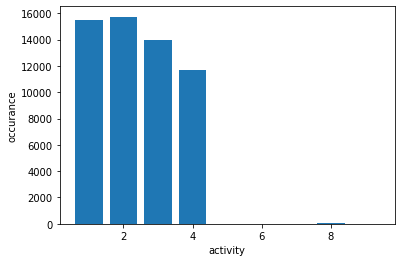

In [41]:
print("stats after filtering dfg compliant cases")
plot_case_occ(df)
  

stats initial
activity   occurance
1             23197
2             21699
3             21343
4             18455
5             4
6             11
7             206
8             591
9             317


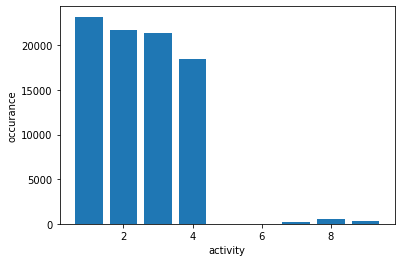

In [42]:
print("stats initial")
plot_case_occ(df2)

In [43]:
# from utils import num_occurance_atob
def num_occurance_atob(a,b,df):
    """
    find num occurance of activity a followed by activity b in dataframe df
    args: a: activity number (dtype: int)
          b: activity number (dtype: int)
          df: dataframe (pandas) where a, b occur (must have ActivityID column)
    returns: num_occurance   (dtype: int)
    """
    h = df[df["class"]==a]
    ind = list(h.index)
    oc = 0
    for i in ind:
        if i < 13709:
            next_act = int(df.iloc[i+1]["class"])
            if next_act == b:
                oc += 1
    
    return oc
num_occurance_atob(1,2,df2)

1880

In [44]:
df2

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,duration_time,remaining_time,class,CaseID
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,69.938889,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,33.221528,36.717361,3,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,36.717361,0.000000,4,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,88.027778,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.171528,79.856250,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101709,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.961111,22.382639,2,24898
101710,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.225000,22.157639,3,24898
101711,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,22.157639,0.000000,4,24898
101712,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,9.061111,1,24899


In [45]:
caseid1 = list(df2["CaseID"])
caseid2 = caseid1.copy()
del caseid2[0]

In [46]:
prev = 0
ind = []
for i,case in enumerate(caseid1):
    if case == prev:
        continue
    else:
        if i==0:
            prev = case
        else:
            ind.append(i)
            prev = case
ind.append(i)

In [47]:
len(ind)

24900

In [48]:
ind[-1]

101713

In [49]:
def num_occurance_atob(a,b,df):
    """
    find num occurance of activity a followed by activity b in dataframe df
    args: a: activity number (dtype: int)
          b: activity number (dtype: int)
          df: dataframe (pandas) where a, b occur (must have ActivityID column)
    returns: num_occurance   (dtype: int)
    """
    h = df[df["class"]==a]
    ind = list(h.index)
    oc = 0
    for i in ind:
        if i < 13709:
            next_act = int(df.iloc[i+1]["class"])
            if next_act == b:
                oc += 1
    
    return oc

In [50]:
act = np.arange(17)
for a in act:
    for b in act:  
        print("{} -> {} : {} ".format(a,b,num_occurance_atob(a,b,df2)))

0 -> 0 : 0 
0 -> 1 : 0 
0 -> 2 : 0 
0 -> 3 : 0 
0 -> 4 : 0 
0 -> 5 : 0 
0 -> 6 : 0 
0 -> 7 : 0 
0 -> 8 : 0 
0 -> 9 : 0 
0 -> 10 : 0 
0 -> 11 : 0 
0 -> 12 : 0 
0 -> 13 : 0 
0 -> 14 : 0 
0 -> 15 : 0 
0 -> 16 : 0 
1 -> 0 : 0 
1 -> 1 : 56 
1 -> 2 : 1880 
1 -> 3 : 497 
1 -> 4 : 1 
1 -> 5 : 0 
1 -> 6 : 0 
1 -> 7 : 5 
1 -> 8 : 6 
1 -> 9 : 8 
1 -> 10 : 1 
1 -> 11 : 1 
1 -> 12 : 0 
1 -> 13 : 0 
1 -> 14 : 0 
1 -> 15 : 86 
1 -> 16 : 78 
2 -> 0 : 0 
2 -> 1 : 237 
2 -> 2 : 184 
2 -> 3 : 2108 
2 -> 4 : 163 
2 -> 5 : 0 
2 -> 6 : 0 
2 -> 7 : 14 
2 -> 8 : 5 
2 -> 9 : 10 
2 -> 10 : 105 
2 -> 11 : 0 
2 -> 12 : 0 
2 -> 13 : 0 
2 -> 14 : 0 
2 -> 15 : 8 
2 -> 16 : 1 
3 -> 0 : 0 
3 -> 1 : 297 
3 -> 2 : 207 
3 -> 3 : 40 
3 -> 4 : 1768 
3 -> 5 : 0 
3 -> 6 : 0 
3 -> 7 : 0 
3 -> 8 : 31 
3 -> 9 : 4 
3 -> 10 : 428 
3 -> 11 : 0 
3 -> 12 : 0 
3 -> 13 : 0 
3 -> 14 : 0 
3 -> 15 : 22 
3 -> 16 : 1 
4 -> 0 : 0 
4 -> 1 : 1868 
4 -> 2 : 71 
4 -> 3 : 58 
4 -> 4 : 34 
4 -> 5 : 0 
4 -> 6 : 0 
4 -> 7 : 1 
4 -> 8 : 33 
4 -> 9 :